In [118]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

In [119]:
x_measure = np.array([2.0, 3.0, 5.0, 7.0, 9.0], dtype=float)
y_measure = np.array([4.0, 5.0, 7.0, 10.0, 15.0], dtype=float)

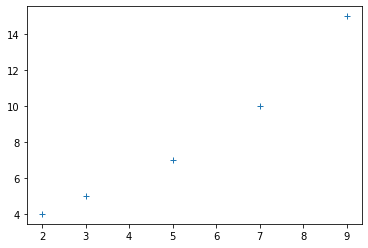

In [120]:
plt.plot(x_measure, y_measure, "+")

In [121]:
def model(X, beta):
    return beta[0]*X**2+beta[1]


In [122]:
theta = np.array([3, -5], dtype=float)
y_model = model(x_measure, theta)
y_model


array([  7.,  22.,  70., 142., 238.])

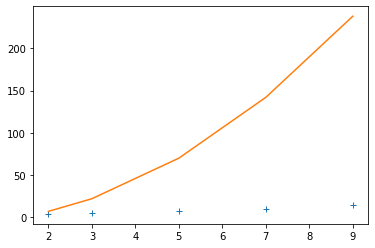

In [123]:

plt.plot(x_measure, y_measure, "+")
plt.plot(x_measure, y_model)

In [124]:
def compute_error(y, func, X):
    return ((func(X) - y))

In [125]:
func1 = partial(model, x_measure)
func2 = partial(compute_error, y_measure, func1)


In [126]:
print(func1(theta))
print(func2(theta))

[  7.  22.  70. 142. 238.]
[  3.  17.  63. 132. 223.]


In [127]:
def compute_jacobien_2d(f, x, dimf, h = 1e-12):
    n = len(x)
    jac = np.zeros((n, dimf), dtype=float)
    for j in range(n):
        x_plus = [(xi if k != j else xi + h) for k, xi in enumerate(x)]
        x_moins = [(xi if k != j else xi - h) for k, xi in enumerate(x)]
        jaci = (f(x_plus) - f(x_moins))/(2*h)
        jac[j:] = jaci
    return jac.T       

B_initial = np.array([0.1, 3])
compute_jacobien_2d(func2, B_initial, len(x_measure))

array([[ 3.99991151,  1.0000889 ],
       [ 9.00013397,  1.0000889 ],
       [25.00044616,  1.0000889 ],
       [49.00035933,  1.0000889 ],
       [81.0009837 ,  1.0000889 ]])

[0.1394831  3.51336785]
2


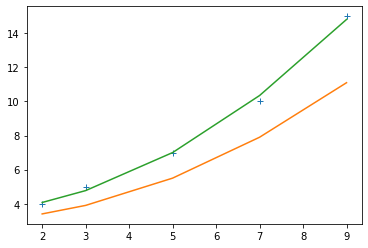

In [117]:
def newton_gauss(residual, B0, dimf, tol = 1e-10, maxits = 256):
    B = B0.copy()
    i = 0
    dBNorm2 = 1e100
    while (i < maxits and dBNorm2 > tol):
        i = i + 1
        r = residual(B)
        Jf = compute_jacobien_2d(residual, B, dimf)
        Jft = Jf.T
        dB = np.dot(np.dot(np.linalg.inv(np.dot(Jft,Jf)),Jft),r)
        dBNorm2 = np.square(dB).sum()
        B -= dB
    return B, i  

B_initial = np.array([0.1, 3])
B_calculated, i = newton_gauss(func2, B_initial, len(x_measure), tol = 1e-8, maxits=1000)
print(B_calculated)
print(i)

plt.plot(x_measure, y_measure, "+")
plt.plot(x_measure, model(x_measure, B_initial))
plt.plot(x_measure, model(x_measure, B_calculated))